## Titanic Survival Prediction Project

## Step 1: Load Dataset and importing necessary libraries

In [255]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [256]:
df = pd.read_csv('tested.csv')

## Step 2: Exploratory Data Analysis (EDA)

In [257]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [258]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [259]:
df.shape

(418, 12)

In [260]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [261]:
df.duplicated().sum()

np.int64(0)

## Step 2: Exploratory Data Analysis (EDA)

In [262]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Step 3: Data Cleaning

In [263]:
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1)

In [264]:
df.duplicated().sum()

np.int64(38)

In [265]:
df = df.drop_duplicates()

In [266]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  380 non-null    int64  
 1   Pclass    380 non-null    int64  
 2   Sex       380 non-null    object 
 3   Age       322 non-null    float64
 4   SibSp     380 non-null    int64  
 5   Parch     380 non-null    int64  
 6   Fare      379 non-null    float64
 7   Embarked  380 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.7+ KB


In [268]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,380.000000,380.000000,322.000000,380.000000,380.000000,379.000000
mean,0.378947,2.218421,30.324534,0.484211,0.431579,38.152946
std,0.485765,0.851618,14.370820,0.925889,1.021176,58.020997
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,2.000000,27.500000,0.000000,0.000000,15.245800
75%,1.000000,3.000000,39.750000,1.000000,0.000000,36.877100
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [269]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        169
Embarked      3
dtype: int64

## Step 4: Feature Encoding

In [270]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [271]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## Step 5: Data Visualization

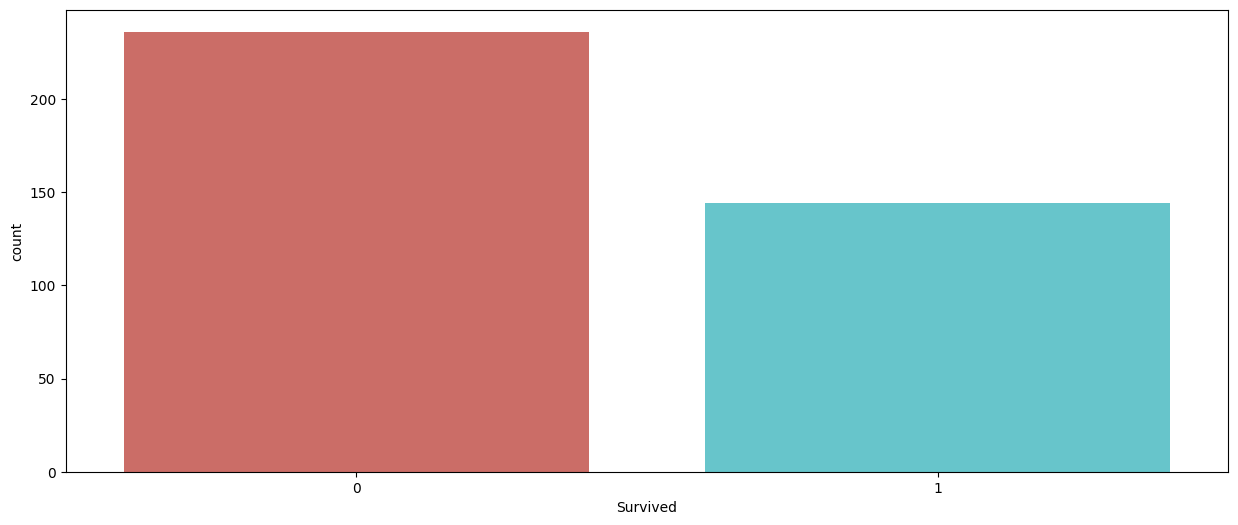

In [272]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['Survived'], data = df, palette='hls')
plt.show()

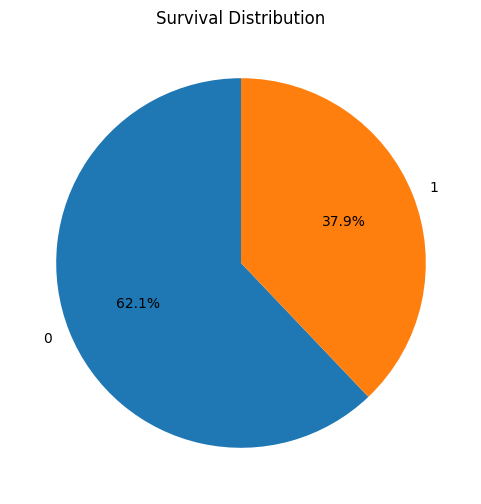

In [273]:
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()

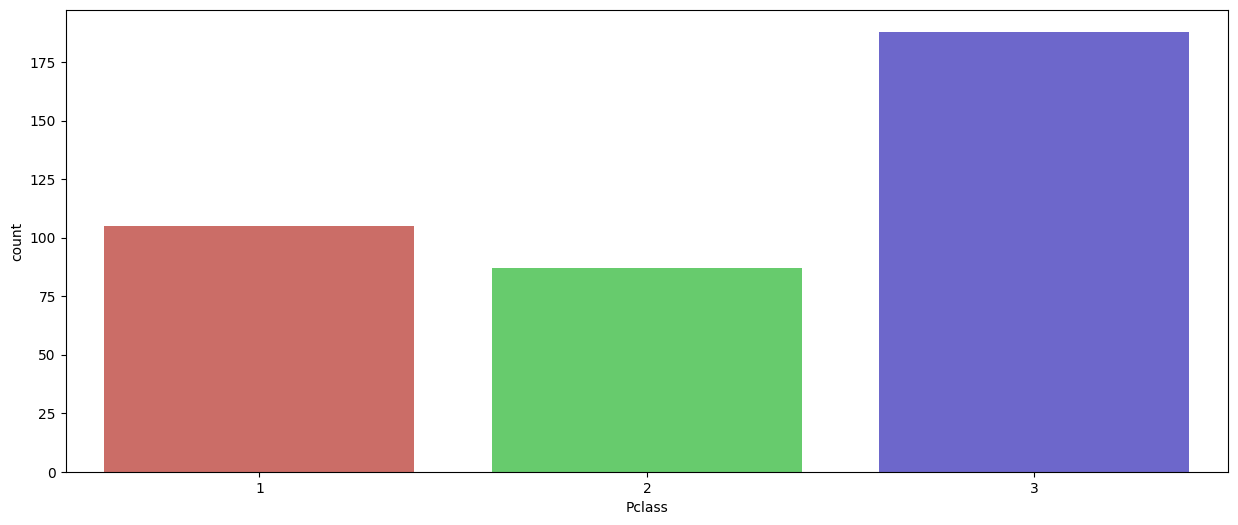

In [274]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['Pclass'], data = df, palette='hls')
plt.show()

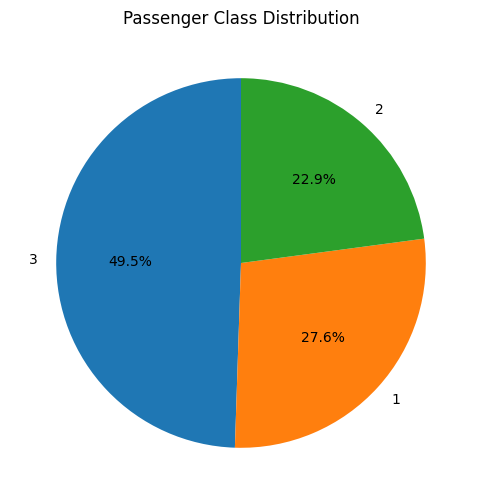

In [275]:
pclass_counts = df['Pclass'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.show()

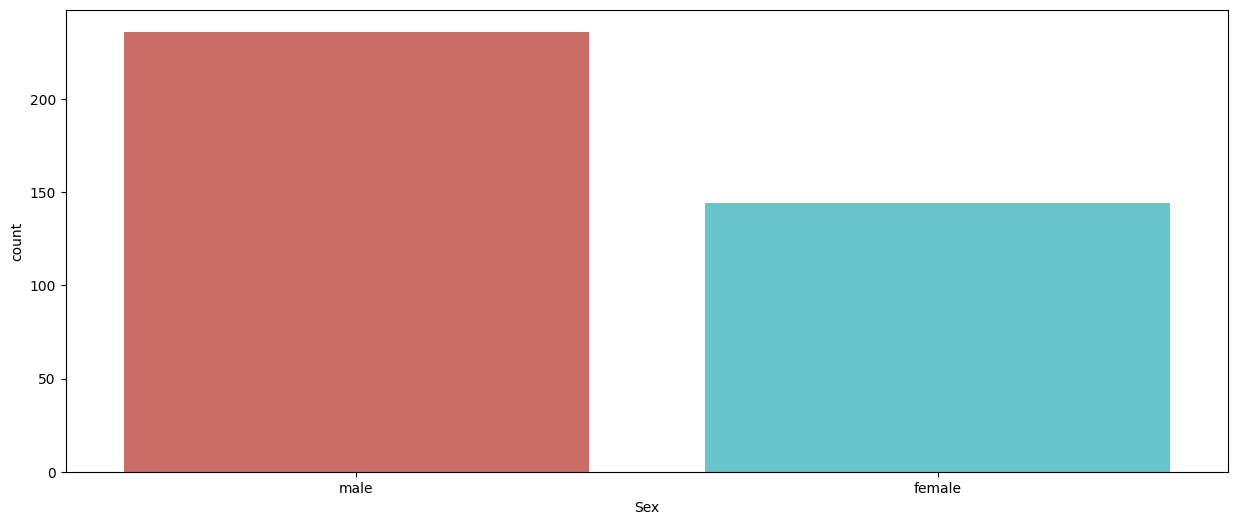

In [276]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['Sex'], data = df, palette='hls')
plt.show()

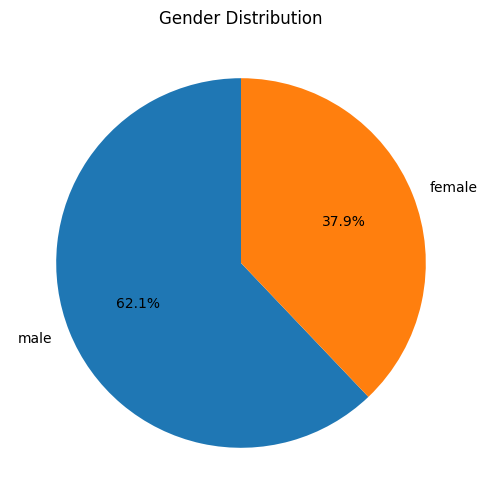

In [277]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

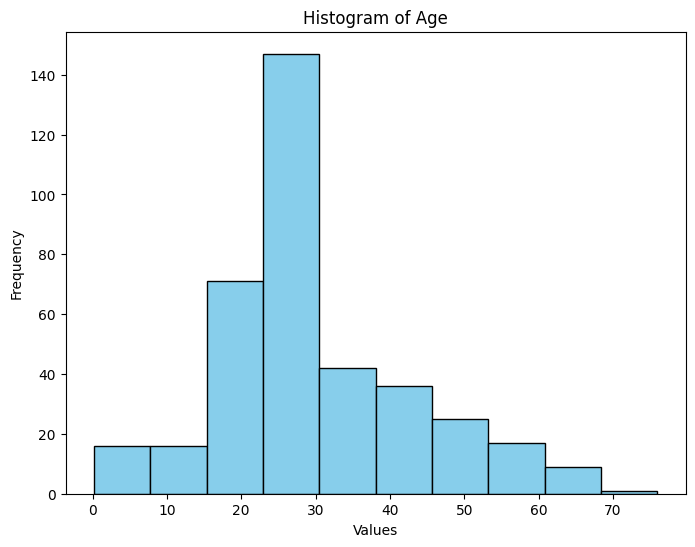

In [278]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

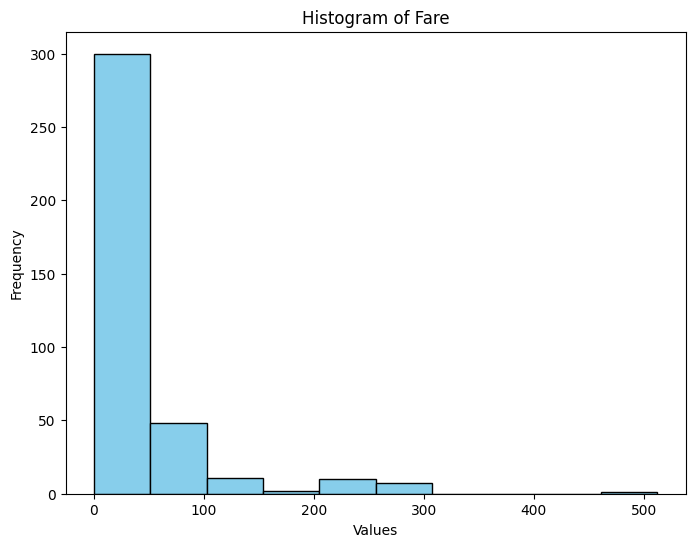

In [279]:
plt.figure(figsize=(8, 6))
plt.hist(df['Fare'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

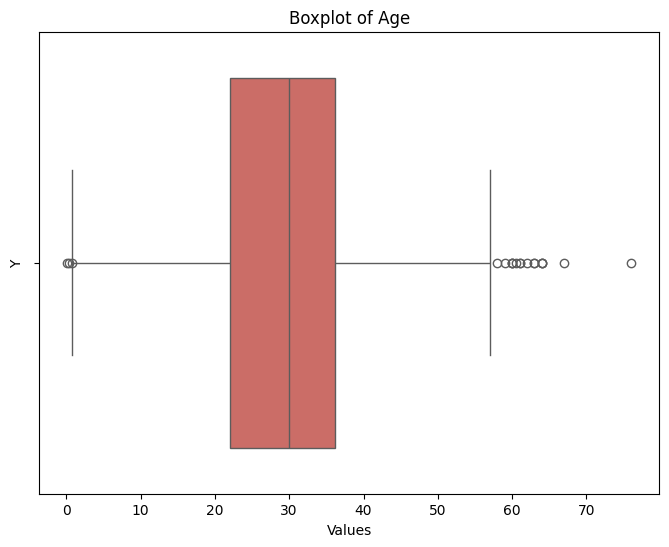

In [280]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['Age'], data = df, palette = 'hls')
plt.title('Boxplot of Age')
plt.xlabel('Values')
plt.ylabel('Y')
plt.show()

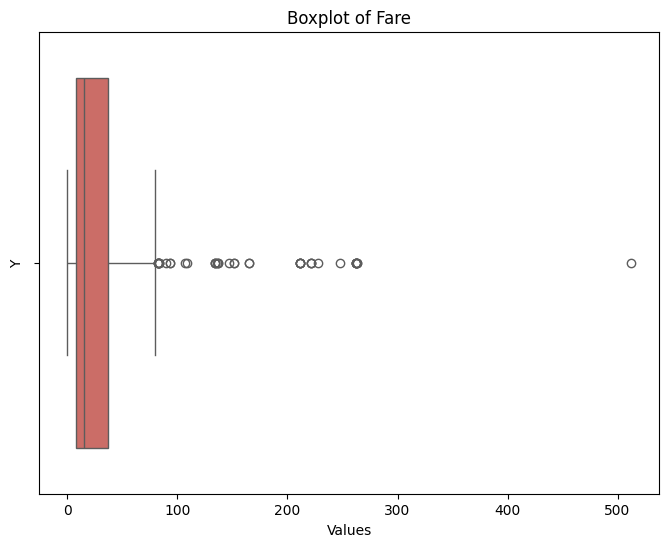

In [281]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['Fare'], data = df, palette = 'hls')
plt.title('Boxplot of Fare')
plt.xlabel('Values')
plt.ylabel('Y')
plt.show()

## Step 6: Model Building

In [282]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.500000,0,0,7.8292,Q
1,1,3,female,47.000000,1,0,7.0000,S
2,0,2,male,62.000000,0,0,9.6875,Q
3,0,3,male,27.000000,0,0,8.6625,S
4,1,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
411,1,1,female,37.000000,1,0,90.0000,Q
412,1,3,female,28.000000,0,0,7.7750,S
414,1,1,female,39.000000,0,0,108.9000,C
415,0,3,male,38.500000,0,0,7.2500,S


In [283]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [284]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.500000,0,0,7.8292,False,True,False,True,False
1,1,3,47.000000,1,0,7.0000,True,False,False,False,True
2,0,2,62.000000,0,0,9.6875,False,True,False,True,False
3,0,3,27.000000,0,0,8.6625,False,True,False,False,True
4,1,3,22.000000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
411,1,1,37.000000,1,0,90.0000,True,False,False,True,False
412,1,3,28.000000,0,0,7.7750,True,False,False,False,True
414,1,1,39.000000,0,0,108.9000,True,False,True,False,False
415,0,3,38.500000,0,0,7.2500,False,True,False,False,True


In [285]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, 
                                                    random_state=42)

# Support Vector Classifier

In [287]:
svc_model = SVC(kernel = 'linear')

In [288]:
imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) 

In [289]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [290]:
y_pred = svc_model.predict(X_test)

In [291]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

1.0
1.0
1.0
1.0
[[47  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        29

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



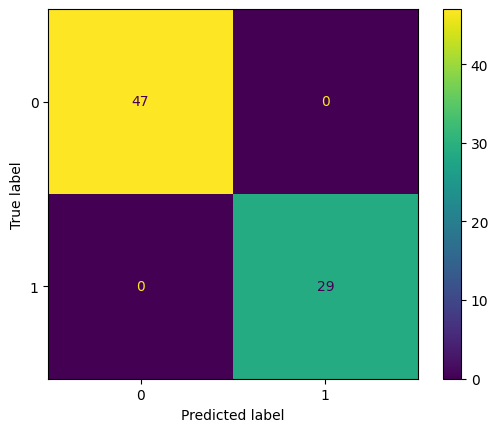

In [292]:
acc = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test)

# Logistic Regression

In [294]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [295]:
y_pred = logreg.predict(X_test)

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_prob = logreg.predict_proba(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

1.0
1.0
1.0
1.0
[[47  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        29

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



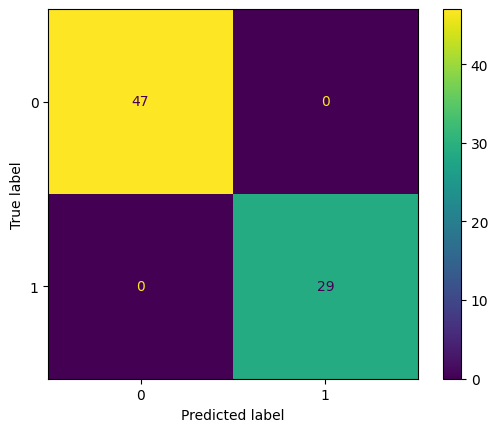

In [297]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

# DecisionTreeClassifier

In [298]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [299]:
y_pred = dt_model.predict(X_test)

In [300]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

1.0
1.0
1.0
1.0
[[47  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        29

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



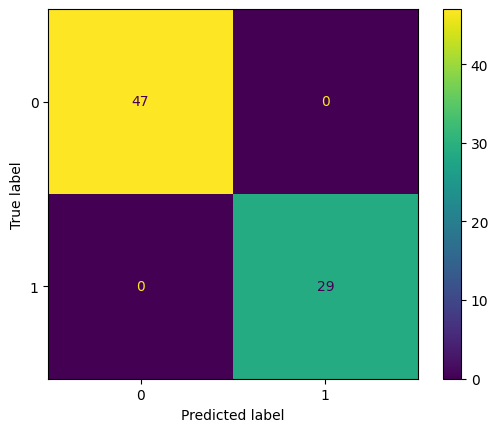

In [301]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)